In [1]:
'''
Author: Dhruv B Kakadiya

'''

'\nAuthor: Dhruv B Kakadiya\n\n'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Roll number is **54** so I have to perform **ONE HOT ENCODING** on features

In [3]:
# Importing needful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
# My roll number is 54 so I have to perform ONE HOT ENCODING on features

from sklearn.datasets import load_digits

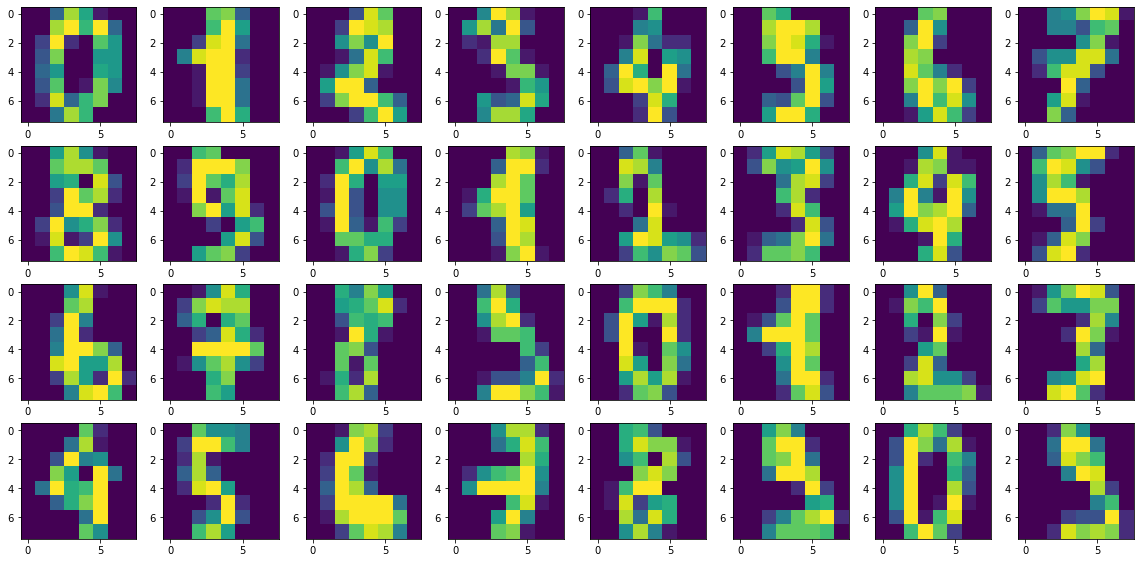

In [5]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(32):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [6]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()

# Roll No is **54** :- Split **65**% - **35**%

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.35, random_state = 48) 

In [12]:
# # Reshape the data

# print(f"X shape :- {X_train.shape}")

# print(f"Y shape :- {Y_train.shape}")

# # x_train and y_test
# # X_train = X_train
# # X_test = X_test

# # ohe.fit(X_train)
# # transformed_X_train = ohe.transform(X_train).toarray()

# # ohe.fit(X_test)
# # transformed_X_test = ohe.transform(X_test).toarray()

# # print("X_transformed shape :- ", transformed_X_train.shape)
# # print(X_train[7])
# # print(transformed_X_train[7])


# # y_train and y_test
# Y_train = Y_train.reshape(-1, 1)
# Y_test = Y_test.reshape(-1, 1)

# ohe.fit(Y_train)
# transformed_Y_train = ohe.transform(Y_train).toarray().reshape(1168, )

# ohe.fit(Y_test)
# transformed_Y_test = ohe.transform(Y_test).toarray()

# print(Y_test[7])
# print(transformed_Y_test[7])

# print(transformed_Y_train.shape)

In [15]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8378378378378378


# **83** % Accuracy

In [16]:
main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

# True Prediction

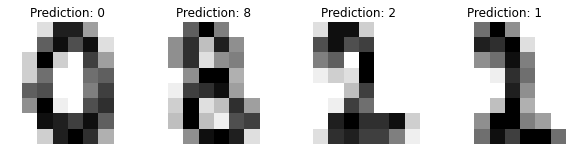

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [18]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.70      0.90      0.79        77
           2       0.94      0.69      0.79        64
           3       0.94      0.79      0.86        58
           4       0.93      0.78      0.85        67
           5       0.91      0.84      0.87        50
           6       0.92      0.97      0.95        71
           7       0.76      0.94      0.84        62
           8       0.61      0.77      0.68        64
           9       0.92      0.69      0.79        49

    accuracy                           0.84       629
   macro avg       0.86      0.83      0.84       629
weighted avg       0.86      0.84      0.84       629




Confusion matrix:
[[64  1  0  0  2  0  0  0  0  0]
 [ 0 69  1  0  0  0  1  0  5  1]
 [ 0  5 44  0  0  0  2  0 13  0]
 [ 0  2  2 46  0  0  0  0  7  1]
 [ 1  3  0  0 52  0  2  8  1  0]
 [ 0  1  0  2  0 42  0  3  1  1]
 [ 0  1  0  0  0  1 69  0  0  0]
 [ 0  0  0  0  1  1  0 58  2  0]
 [ 0 11  0  1  0  1  0  2 49  0]
 [ 0  5  0  0  1  1  1  5  2 34]]


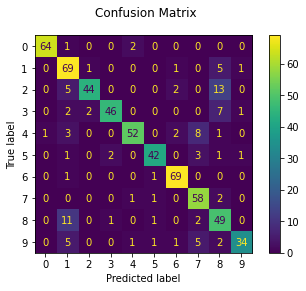

In [19]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()